In [ ]:
# Libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

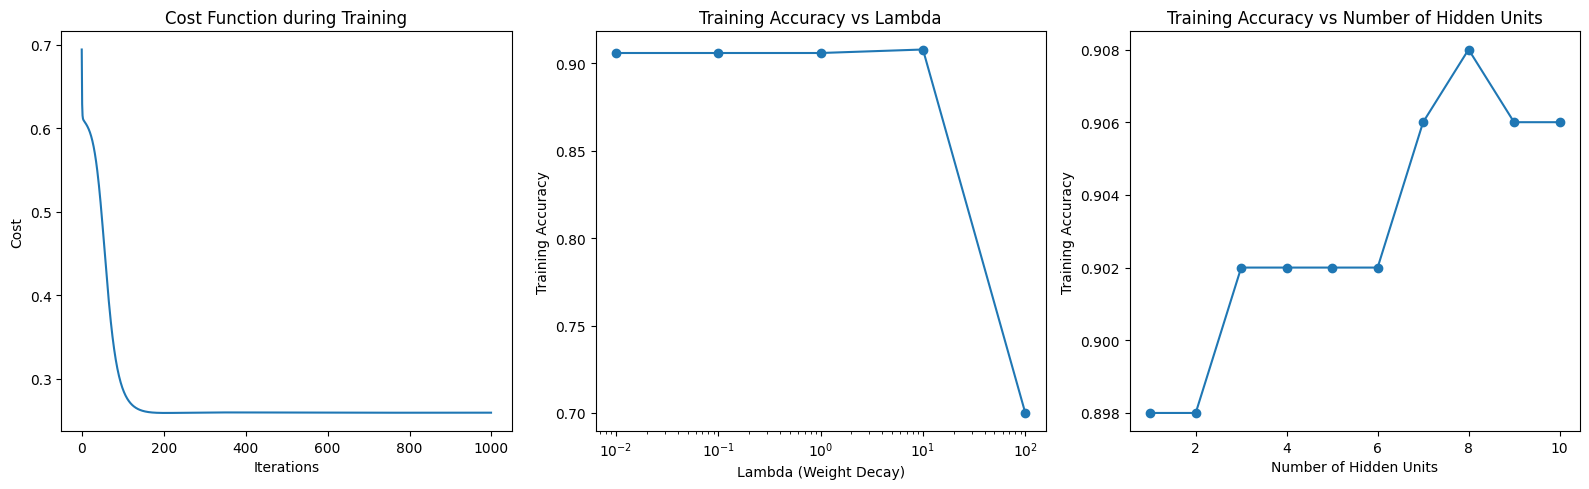

In [ ]:
# A: Simulate classification data
X, y = make_classification(n_samples = 500, n_features = 3,
                           n_informative = 2, n_redundant = 1,
                           n_classes = 2, weights = [0.3, 0.7],
                           random_state = 42)
X = np.c_[np.ones(X.shape[0]), X]  # Add bias term (1s)

# B: Define Neural Network architecture and training functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def compute_cost(Y, Y_hat, W1, W2, lambda_reg):
    m = Y.shape[0]
    cost = -np.mean(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))  # Cross-entropy
    regularization = (lambda_reg / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))  # L2 regularization
    return cost + regularization

def forward(X, W1, W2, b1, b2):
    Z1 = np.dot(X, W1.T) + b1
    A1 = sigmoid(Z1)
    A1 = np.c_[np.ones(A1.shape[0]), A1]  # Add bias to A1
    Z2 = np.dot(A1, W2.T) + b2
    Y_hat = sigmoid(Z2)
    return A1, Y_hat

def backpropagate(X, Y, W1, W2, A1, Y_hat, lambda_reg, b1, b2):
    m = X.shape[0]

    delta2 = Y_hat - Y  # Shape: (m, 1)
    dW2 = (1 / m) * np.dot(delta2.T, A1) + (lambda_reg / m) * W2  # Shape: (1, hidden_units + 1)
    db2 = (1 / m) * np.sum(delta2, axis = 0, keepdims = True)

    delta1 = np.dot(delta2, W2[:, 1:]) * sigmoid_prime(A1[:, 1:])
    dW1 = (1 / m) * np.dot(delta1.T, X) + (lambda_reg / m) * W1  # Shape: (hidden_units, input_units)
    db1 = (1 / m) * np.sum(delta1, axis = 0, keepdims = True)

    return dW1, dW2, db1, db2

def train_neural_network(X, y, hidden_units = 10,
                         lambda_reg = 0.1, alpha = 0.1, iterations = 1000):
    np.random.seed(42)  # For reproducibility of weight initialization
    input_units = X.shape[1]  # 4 (3 features + bias)
    output_units = 1  # binary classification (1 output unit)

    W1 = np.random.randn(hidden_units, input_units) * 0.01
    W2 = np.random.randn(output_units, hidden_units + 1) * 0.01
    b1 = np.zeros((1, hidden_units))
    b2 = np.zeros((1, output_units))

    costs = []
    Y = y.reshape(-1, 1)

    for i in range(iterations):
        A1, Y_hat = forward(X, W1, W2, b1, b2)
        cost = compute_cost(Y, Y_hat, W1, W2, lambda_reg)
        costs.append(cost)

        dW1, dW2, db1, db2 = backpropagate(X, Y, W1, W2, A1, Y_hat, lambda_reg, b1, b2)

        W1 -= alpha * dW1
        W2 -= alpha * dW2
        b1 -= alpha * db1
        b2 -= alpha * db2

    return W1, W2, b1, b2, costs

def evaluate_accuracy(X, y, W1, W2, b1, b2):
    _, Y_hat = forward(X, W1, W2, b1, b2)
    predictions = (Y_hat > 0.5).astype(int)
    return accuracy_score(y, predictions)

# C: Training the network
W1, W2, b1, b2, costs = train_neural_network(X, y, hidden_units = 10,
                                             lambda_reg = 0.1, alpha = 0.5, iterations = 1000)

# D: Training accuracy for different values of lambda_reg
lambda_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for lambda_val in lambda_values:
    W1, W2, b1, b2, _ = train_neural_network(X, y, hidden_units = 10,
                                             lambda_reg = lambda_val, alpha = 0.5, iterations = 1000)
    accuracy = evaluate_accuracy(X, y, W1, W2, b1, b2)
    accuracies.append(accuracy)

# E: Varying the number of hidden units
hidden_unit_range = range(1, 11)
accuracies_by_hidden_units = []

for hidden_units in hidden_unit_range:
    W1, W2, b1, b2, _ = train_neural_network(X, y, hidden_units = hidden_units,
                                             lambda_reg = 0.1, alpha = 0.5, iterations = 1000)
    accuracy = evaluate_accuracy(X, y, W1, W2, b1, b2)
    accuracies_by_hidden_units.append(accuracy)

# Plots
fig, axs = plt.subplots(1, 3, figsize = (16, 5))

# Plot 1: Cost Function vs Iterations
axs[0].plot(costs)
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Cost')
axs[0].set_title('Cost Function during Training')

# Plot 2: Training Accuracy vs Lambda (Weight Decay)
axs[1].plot(lambda_values, accuracies, marker = 'o')
axs[1].set_xscale('log')
axs[1].set_xlabel('Lambda (Weight Decay)')
axs[1].set_ylabel('Training Accuracy')
axs[1].set_title('Training Accuracy vs Lambda')

# Plot 3: Training Accuracy vs Number of Hidden Units
axs[2].plot(hidden_unit_range, accuracies_by_hidden_units, marker = 'o')
axs[2].set_xlabel('Number of Hidden Units')
axs[2].set_ylabel('Training Accuracy')
axs[2].set_title('Training Accuracy vs Number of Hidden Units')

plt.tight_layout()
plt.show()

For the regularization parameter, the accuracy is virtually unchanged for values less than or equal to 10. However, a much bigger value of 100 decreases the accuracy drastically, taking it from 90% to 70%.

As for the number of training units, while 8 units maximize the training accuracy, the difference between any units in the range 1 to 10 is negligible. Therefore, for computational efficiency, I would personally choose just 1 hidden unit.